## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [2]:
dataset = pd.read_csv('Train.csv')
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

## Handling Missing Values

In [3]:
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [4]:
y.isnull().sum()

0

In [5]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer1.fit(X[['Item_Weight']])
X[['Item_Weight']] = imputer1.transform(X[['Item_Weight']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer2.fit(X[['Outlet_Size']])
X[['Outlet_Size']] = imputer2.transform(X[['Outlet_Size']])

In [6]:
print(pd.isnull(X).sum())
X.dtypes

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [7]:
""" LF=X['Item_Fat_Content']=='Low Fat'
R=X['Item_Fat_Content']=='Regular'
LF2=X['Item_Fat_Content']=='LF'
R2=X['Item_Fat_Content']=='reg'
LF3=X['Item_Fat_Content']=='low fat'

Low = LF + LF2 + LF3
REG = R + R2
X.loc[Low, "Item_Weight"]= X.loc[Low, "Item_Weight"].fillna(X.loc[Low, "Item_Weight"].mean())
X.loc[REG, "Item_Weight"]= X.loc[REG, "Item_Weight"].fillna(X.loc[REG, "Item_Weight"].mean()) """

' LF=X[\'Item_Fat_Content\']==\'Low Fat\'\nR=X[\'Item_Fat_Content\']==\'Regular\'\nLF2=X[\'Item_Fat_Content\']==\'LF\'\nR2=X[\'Item_Fat_Content\']==\'reg\'\nLF3=X[\'Item_Fat_Content\']==\'low fat\'\n\nLow = LF + LF2 + LF3\nREG = R + R2\nX.loc[Low, "Item_Weight"]= X.loc[Low, "Item_Weight"].fillna(X.loc[Low, "Item_Weight"].mean())\nX.loc[REG, "Item_Weight"]= X.loc[REG, "Item_Weight"].fillna(X.loc[REG, "Item_Weight"].mean()) '

## Scaler

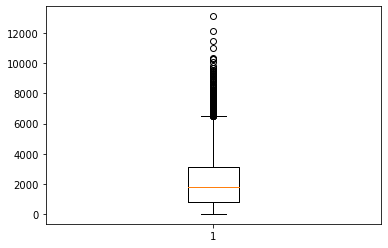

In [8]:
plt.boxplot(y)
plt.show()

In [9]:
y=y.values
y=y.reshape(-1,1)

In [10]:
sc = StandardScaler()
scX = StandardScaler()
y=sc.fit_transform(y)

## encoding 


In [11]:
oh1 =OneHotEncoder(handle_unknown="ignore")
ct1 = ColumnTransformer(transformers = [('encoder',oh1,[1,3,9])], remainder ='passthrough')
X = np.array(ct1.fit_transform(X))

In [12]:
oh2 =OneHotEncoder(handle_unknown="ignore")
ct2= ColumnTransformer(transformers = [('encoder', oh2,[28])], remainder ='passthrough')
X = np.array(ct2.fit_transform(X))

In [13]:
le1 = LabelEncoder()
le2 = LabelEncoder()
X[:,39] = le1.fit_transform(X[:,39])
X[:,40] = le2.fit_transform(X[:,40])

## Splitting the dataset into the Training set and Test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## LinearRegression

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred=regressor.predict(X_test)
y_test = sc.inverse_transform(y_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 792.0012172993
mse 1143836.323097761
Rmse 1069.502839219121


## XGBoost

In [17]:
my_model = XGBRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
my_model.fit(X_train, y_train,verbose=False)

[21:09:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(alpha=0.9, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_samples_leaf=3,
             min_samples_split=2, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=12, num_parallel_tree=1, predictor='auto',
             random_state=30, reg_alpha=0.899999976, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, ...)

In [18]:
y_pred=my_model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 723.0182245169024
mse 1065131.5781439054
Rmse 1032.0521198776278


## GradientBoostingRegressor


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

c:\Users\Ruby\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mae 722.9366824359455
mse 1073140.8061991136
Rmse 1035.9250968091822


## PRED ON TEST

In [20]:
test = pd.read_csv('Test.csv').iloc[:,1:]

In [21]:
pd.DataFrame(test).isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
test[['Item_Weight']] = imputer1.transform(test[['Item_Weight']])
test[['Outlet_Size']] = imputer2.transform(test[['Outlet_Size']])

In [23]:
""" LF=test['Item_Fat_Content']=='Low Fat'
R=test['Item_Fat_Content']=='Regular'
LF2=test['Item_Fat_Content']=='LF'
R2=test['Item_Fat_Content']=='reg'
LF3=test['Item_Fat_Content']=='low fat'

Low = LF + LF2 + LF3
REG = R + R2
test.loc[Low, "Item_Weight"]= test.loc[Low, "Item_Weight"].fillna(test.loc[Low, "Item_Weight"].mean())
test.loc[REG, "Item_Weight"]= test.loc[REG, "Item_Weight"].fillna(test.loc[REG, "Item_Weight"].mean()) """

' LF=test[\'Item_Fat_Content\']==\'Low Fat\'\nR=test[\'Item_Fat_Content\']==\'Regular\'\nLF2=test[\'Item_Fat_Content\']==\'LF\'\nR2=test[\'Item_Fat_Content\']==\'reg\'\nLF3=test[\'Item_Fat_Content\']==\'low fat\'\n\nLow = LF + LF2 + LF3\nREG = R + R2\ntest.loc[Low, "Item_Weight"]= test.loc[Low, "Item_Weight"].fillna(test.loc[Low, "Item_Weight"].mean())\ntest.loc[REG, "Item_Weight"]= test.loc[REG, "Item_Weight"].fillna(test.loc[REG, "Item_Weight"].mean()) '

In [24]:
pd.DataFrame(test).isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
test = np.array(ct1.transform(test))
test = np.array(ct2.transform(test))

In [26]:
test[:,39] = le1.transform(test[:,39])
test[:,40] = le2.transform(test[:,40])

In [27]:
#my_model = XGBRegressor(n_estimators=1000,learning_rate=0.005)
my_model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
my_model.fit(X, y)

c:\Users\Ruby\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=3,
                          n_estimators=80, random_state=30)

In [28]:
y_test_pred = my_model.predict(test)

In [29]:
y_test_pred = sc.inverse_transform(y_test_pred)

In [30]:
pd.DataFrame(y_test_pred).head(15)

,0
0,1676.059734
1,1389.644110
2,643.288573
3,2455.474219
4,5975.270996
5,1918.369340
6,686.474939
7,2213.896757
8,1504.909828
9,3155.342965


In [31]:
final = pd.read_csv('Test.csv')
final['Item_Outlet_Sales']=y_test_pred
final=final.drop(['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
final.to_csv("Final_Test_Pred.csv",index=False)

In [32]:
print(final['Item_Outlet_Sales'].min())

100.01874967345566
